In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

ox.config(data_folder="test",log_file=False, log_console=True, use_cache=True)

In [2]:
place = 'Pittsburgh, Pennsylvania, USA'

In [3]:
pgh_gdf = ox.gdf_from_place(place)
# ox.save_gdf_shapefile(pgh_gdf, filename='pgh-bound')
pgh_bound_poly = pgh_gdf.loc[0, 'geometry']
pgh_gdf

,bbox_east,bbox_north,bbox_south,bbox_west,geometry,place_name
0,-79.865728,40.501202,40.36152,-80.095517,"POLYGON ((-79.96244 40.409638, -79.962687 40.4...","PGH, Allegheny County, Pennsylvania, United St..."


In [4]:
type(pgh_bound_poly)

shapely.geometry.polygon.Polygon

In [5]:
# get a graph for whole city with additional buffer
pgh_full = ox.graph_from_place(place,
                          network_type="drive_service",
                          retain_all=True, simplify=True, truncate_by_edge=False, clean_periphery=True,
                          buffer_dist=900, name="PGH Full drive")
# Reproject for faster processing
pgh_full_prj = ox.project_graph(pgh_full)

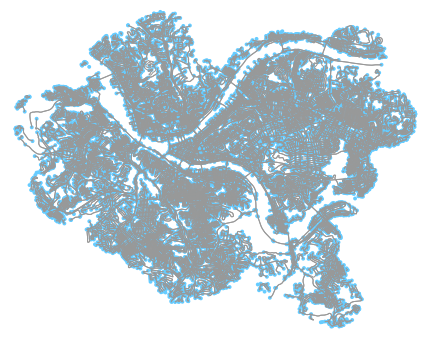

In [6]:
fig, ax = ox.plot_graph(pgh_full_prj)
# Output to shp
ox.save_graph_shapefile(pgh_full_prj, filename='pgh_road_full')
# Output for NetworkX
ox.save_graphml(pgh_full_prj, filename='pgh_road_full.graphml',gephi=True)

> `PGH-Less` is ONLY intended to mark the out-of-boundary area!

In [7]:
# get a graph for whole city with NO buffer
pgh_less = ox.graph_from_place(place,
                          network_type="drive_service",
                          retain_all=True, simplify=True, truncate_by_edge=False, clean_periphery=True,
                          buffer_dist=None, name="PGH Lesser drive")
# Reproject for faster processing
pgh_less_prj = ox.project_graph(pgh_less)

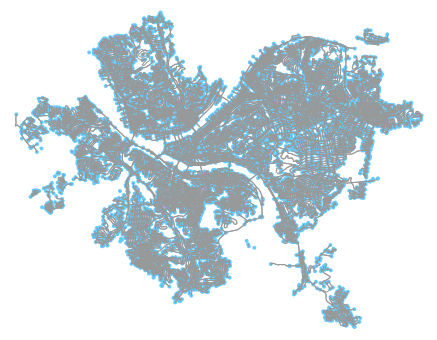

In [8]:
fig, ax = ox.plot_graph(pgh_less_prj)
# Output to shp
ox.save_graph_shapefile(pgh_less_prj, filename='pgh_road_less')
# Output for NetworkX
ox.save_graphml(pgh_less_prj, filename='pgh_road_less.graphml',gephi=True)

In [9]:
bridge_pgh = nx.get_edge_attributes(pgh_full,'bridge')

In [10]:
pgh_full.get_edge_data(105250483, 5320855570)

{0: {'osmid': [25382304, 388306498, 11965353, 386877044, 550943996, 550943998],
  'oneway': False,
  'lanes': ['3', '2'],
  'name': ['Greenfield Road', 'Greenfield Bridge', 'Beechwood Boulevard'],
  'highway': 'secondary',
  'length': 792.4359999999999,
  'bridge': 'yes',
  'geometry': <shapely.geometry.linestring.LineString at 0xa17afeb38>}}

In [13]:
pgh_full.nodes[5320855570]

{'y': 40.4273332, 'x': -79.938558, 'osmid': 5320855570}

In [14]:
pgh_full[5320855570]

AdjacencyView({105797418: {0: {'osmid': 270554718, 'oneway': False, 'lanes': '3', 'name': 'Beechwood Boulevard', 'highway': 'secondary', 'length': 32.391999999999996, 'geometry': <shapely.geometry.linestring.LineString object at 0xa1788e0f0>}}, 5320855574: {0: {'osmid': 388365893, 'oneway': False, 'lanes': '2', 'highway': 'tertiary_link', 'length': 42.456, 'geometry': <shapely.geometry.linestring.LineString object at 0xa1788e128>}}, 105250483: {0: {'osmid': [25382304, 388306498, 11965353, 386877044, 550943996, 550943998], 'oneway': False, 'lanes': ['3', '2'], 'name': ['Greenfield Road', 'Greenfield Bridge', 'Beechwood Boulevard'], 'highway': 'secondary', 'length': 792.4359999999999, 'bridge': 'yes', 'geometry': <shapely.geometry.linestring.LineString object at 0xa1788e160>}}})

In [26]:
pgh_full[104185921][104185917]

AtlasView({0: {'osmid': 11651779, 'name': 'Alan Street', 'highway': 'residential', 'oneway': False, 'length': 126.767}})

In [28]:
pgh_full[104185927][104185921]

AtlasView({0: {'osmid': 11651779, 'name': 'Alan Street', 'highway': 'residential', 'oneway': False, 'length': 91.371}})